In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import copy
from typing import List

In [10]:
df = pd.read_excel("data/World_military_power.xlsx", header=1)
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


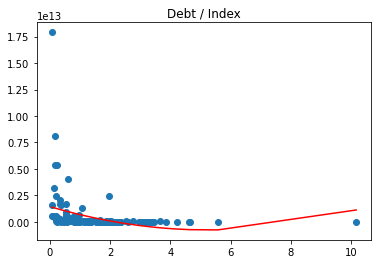

In [37]:
df_cp = df[["Military Strength Power Index", "External Debt value"]].copy()
df_cp["External Debt value"].replace(',','', regex=True, inplace=True)
df_cp = df_cp.astype({"External Debt value": np.int64})
df_cp.sort_values("Military Strength Power Index", inplace=True)

militaryIndex = df_cp["Military Strength Power Index"]
debtValue = df_cp["External Debt value"]

plt.scatter(militaryIndex, debtValue)
z = np.polyfit(militaryIndex, debtValue, 2)
p = np.poly1d(z)
trend_h = p(militaryIndex)
plt.plot(militaryIndex, trend_h, "r-")
plt.title("Debt / Index")
plt.show()